<a href="https://colab.research.google.com/github/SumitKKumawat/Images/blob/master/Session2_Sumit_K_Kumawat_EVA_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


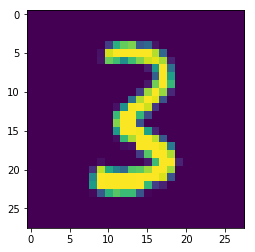

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[50000])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(1024, 3, 3, activation='relu'))
model.add(Convolution2D(2048, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 422s 7ms/step - loss: 1.4811 - acc: 0.4734
Epoch 2/10
60000/60000 [==============================] - 417s 7ms/step - loss: 1.3022 - acc: 0.5411
Epoch 3/10
60000/60000 [==============================] - 418s 7ms/step - loss: 1.1850 - acc: 0.5898
Epoch 4/10
60000/60000 [==============================] - 417s 7ms/step - loss: 1.1802 - acc: 0.5912
Epoch 5/10
60000/60000 [==============================] - 417s 7ms/step - loss: 1.1754 - acc: 0.5927
Epoch 6/10
60000/60000 [==============================] - 420s 7ms/step - loss: 1.1733 - acc: 0.5927
Epoch 7/10
60000/60000 [==============================] - 422s 7ms/step - loss: 1.1716 - acc: 0.5937
Epoch 8/10
60000/60000 [==============================] - 425s 7ms/step - loss: 1.1706 - acc: 0.5935
Epoch 9/10
60000/60000 [==============================] - 421s 7ms/step - loss: 1.1672 - acc: 0.5944
Epoch 10/10
60000/60000 [==============================] - 422s 7ms/step - loss: 1.0746 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[1.3136315919876098, 0.4727]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [3.4929646e-05 3.4929646e-05 9.9746454e-01 3.4929646e-05 3.4929646e-05
  3.4929646e-05 2.2558686e-03 3.4929646e-05 3.4929646e-05 3.4929646e-05]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [9.9903250e-01 4.4193002e-05 4.4193002e-05 4.4193002e-05 4.4193002e-05
  4.4193002e-05 6.1406923e-04 4.4193002e-05 4.4193002e-05 4.4193002e-05]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 